In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
import joblib
from pandas.api.types import is_string_dtype,is_numeric_dtype



In [367]:
#click on raw option while taking the url of a file available in github
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [368]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [369]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [370]:
#from above output we can see there are some null values available in data .
#Lets handle it

for col in df.columns:
    if(df[col].isnull().sum()>0):
        if(df[col].dtype!=np.integer and df[col].dtype!=np.floating):
            simpleImputer=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
            simpleImputer.fit(df[[col]])
            df[col]=simpleImputer.fit_transform(df[[col]]).ravel()
        else:
            simpleImputer=SimpleImputer(missing_values=np.NaN,strategy='mean')
            simpleImputer.fit(df[[col]])
            df[col]=simpleImputer.fit_transform(df[[col]]).ravel()
            
            
            
print(df.isnull().sum())            

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [371]:
    count=0
    count1=0
    count2=0
    for col in df.columns:
        print(df[col].dtype,is_string_dtype(df[col]))
        if(is_string_dtype(df[col]) and (df[col].str.strip()).isin(['?']).sum()>0):
            df[col]=df[col].str.strip()
            simpleImputer=SimpleImputer(missing_values='?',strategy='most_frequent')
            simpleImputer.fit(df[[col]])
            df[col]=simpleImputer.fit_transform(df[[col]]).ravel()
        
        elif(df[col].isin([0]).sum()>0):
            simpleImputer=SimpleImputer(missing_values=0,strategy='mean')
            simpleImputer.fit(df[[col]])
            df[col]=simpleImputer.fit_transform(df[[col]]).ravel()
        elif(df[col].isin([-1]).sum()>0):
            simpleImputer=SimpleImputer(missing_values=-1,strategy='mean')
            simpleImputer.fit(df[[col]])
            df[col]=simpleImputer.fit_transform(df[[col]]).ravel()
            

object True
float64 False
object True
float64 False
object True
float64 False
object True
int64 False
object True
object True
object True
float64 False


In [372]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [373]:
    #convert string datatype to numeric
    for col in df.columns:
        if(is_string_dtype(df[col])):
            labelEncoder=LabelEncoder()
            df[col]=labelEncoder.fit_transform(df[col])

print(df.dtypes)

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object


In [374]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.070482,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.070482,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [375]:
corr_=df.corr()
corr_

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.029341,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.017763,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.032813,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.029341,-0.017763,0.032813,1.000000,-0.035922,-0.005515,-0.106405,-0.078316,0.072297,-0.027742,-0.179380,-0.134035
Item_Type,-0.017973,0.028015,-0.115958,-0.035922,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.005515,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.106405,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.078316,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.072297,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.027742,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


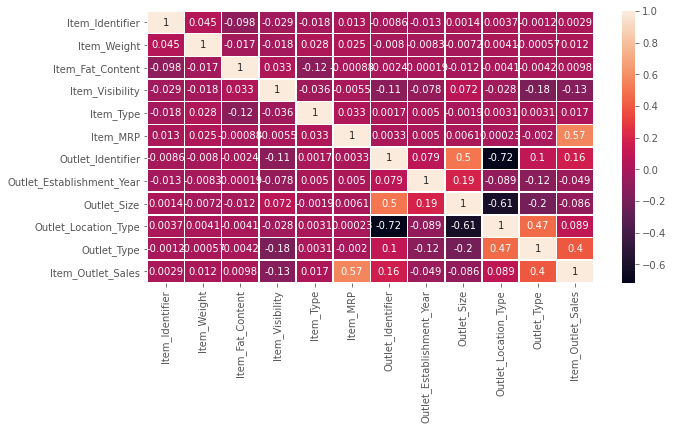

In [376]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_,annot=True, linewidths=.5)

In [377]:
#from above map we can see that Outlet_Location_Type is strongly corelate with Outlet_Identifier
#we will remove anyone of them .Lets remove Outlet_Location_Type

df=df.drop(['Outlet_Location_Type'],axis=1)
df.shape


(8523, 11)

In [378]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,1,2097.2700
3,1121,19.200,2,0.070482,6,182.0950,0,1998,1,0,732.3800
4,1297,8.930,1,0.070482,9,53.8614,1,1987,0,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,1845.5976


In [379]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.070482,7.226681,140.992782,4.722281,1997.831867,1.170832,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.048730,4.209990,62.275067,2.837201,8.371760,0.600327,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.033085,4.000000,93.826500,2.000000,1987.000000,1.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.062517,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,3.000000,13086.964800


In [380]:
#Few right skewed data found from above output (mean > std) .It sld be in normal distribution .Lets reconfirm it
#Can see few outliers present in data .(huge difference between 75% and 25%)


df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.271273
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D00FF39220>,
      dtype=object)

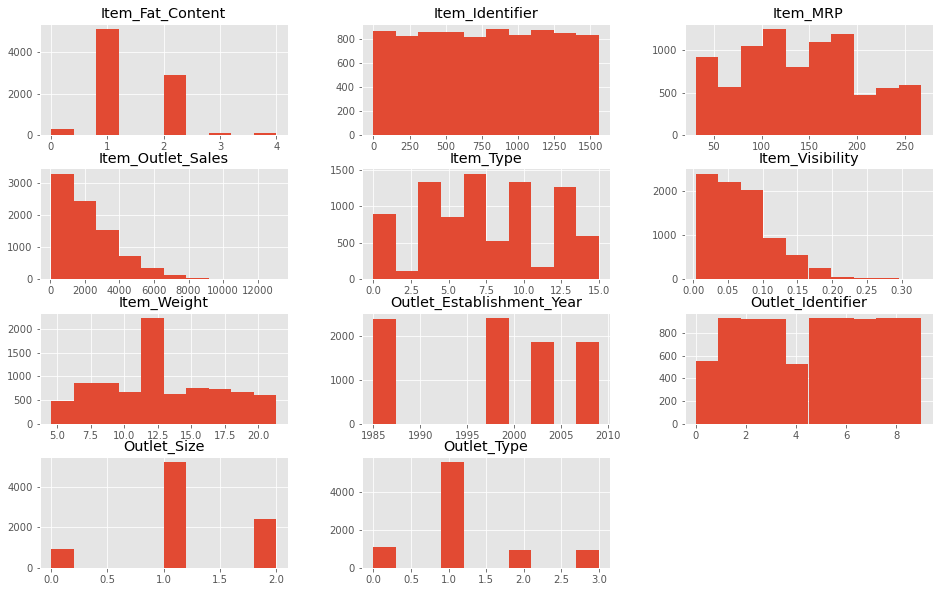

In [381]:
#Item_Fat_Content,Item_Visibility,Outlet_Type and Item_Outlet_Sales columns have skewed data (ie. >0.55)
#Lets visualize it

df.hist(figsize=(16, 10))


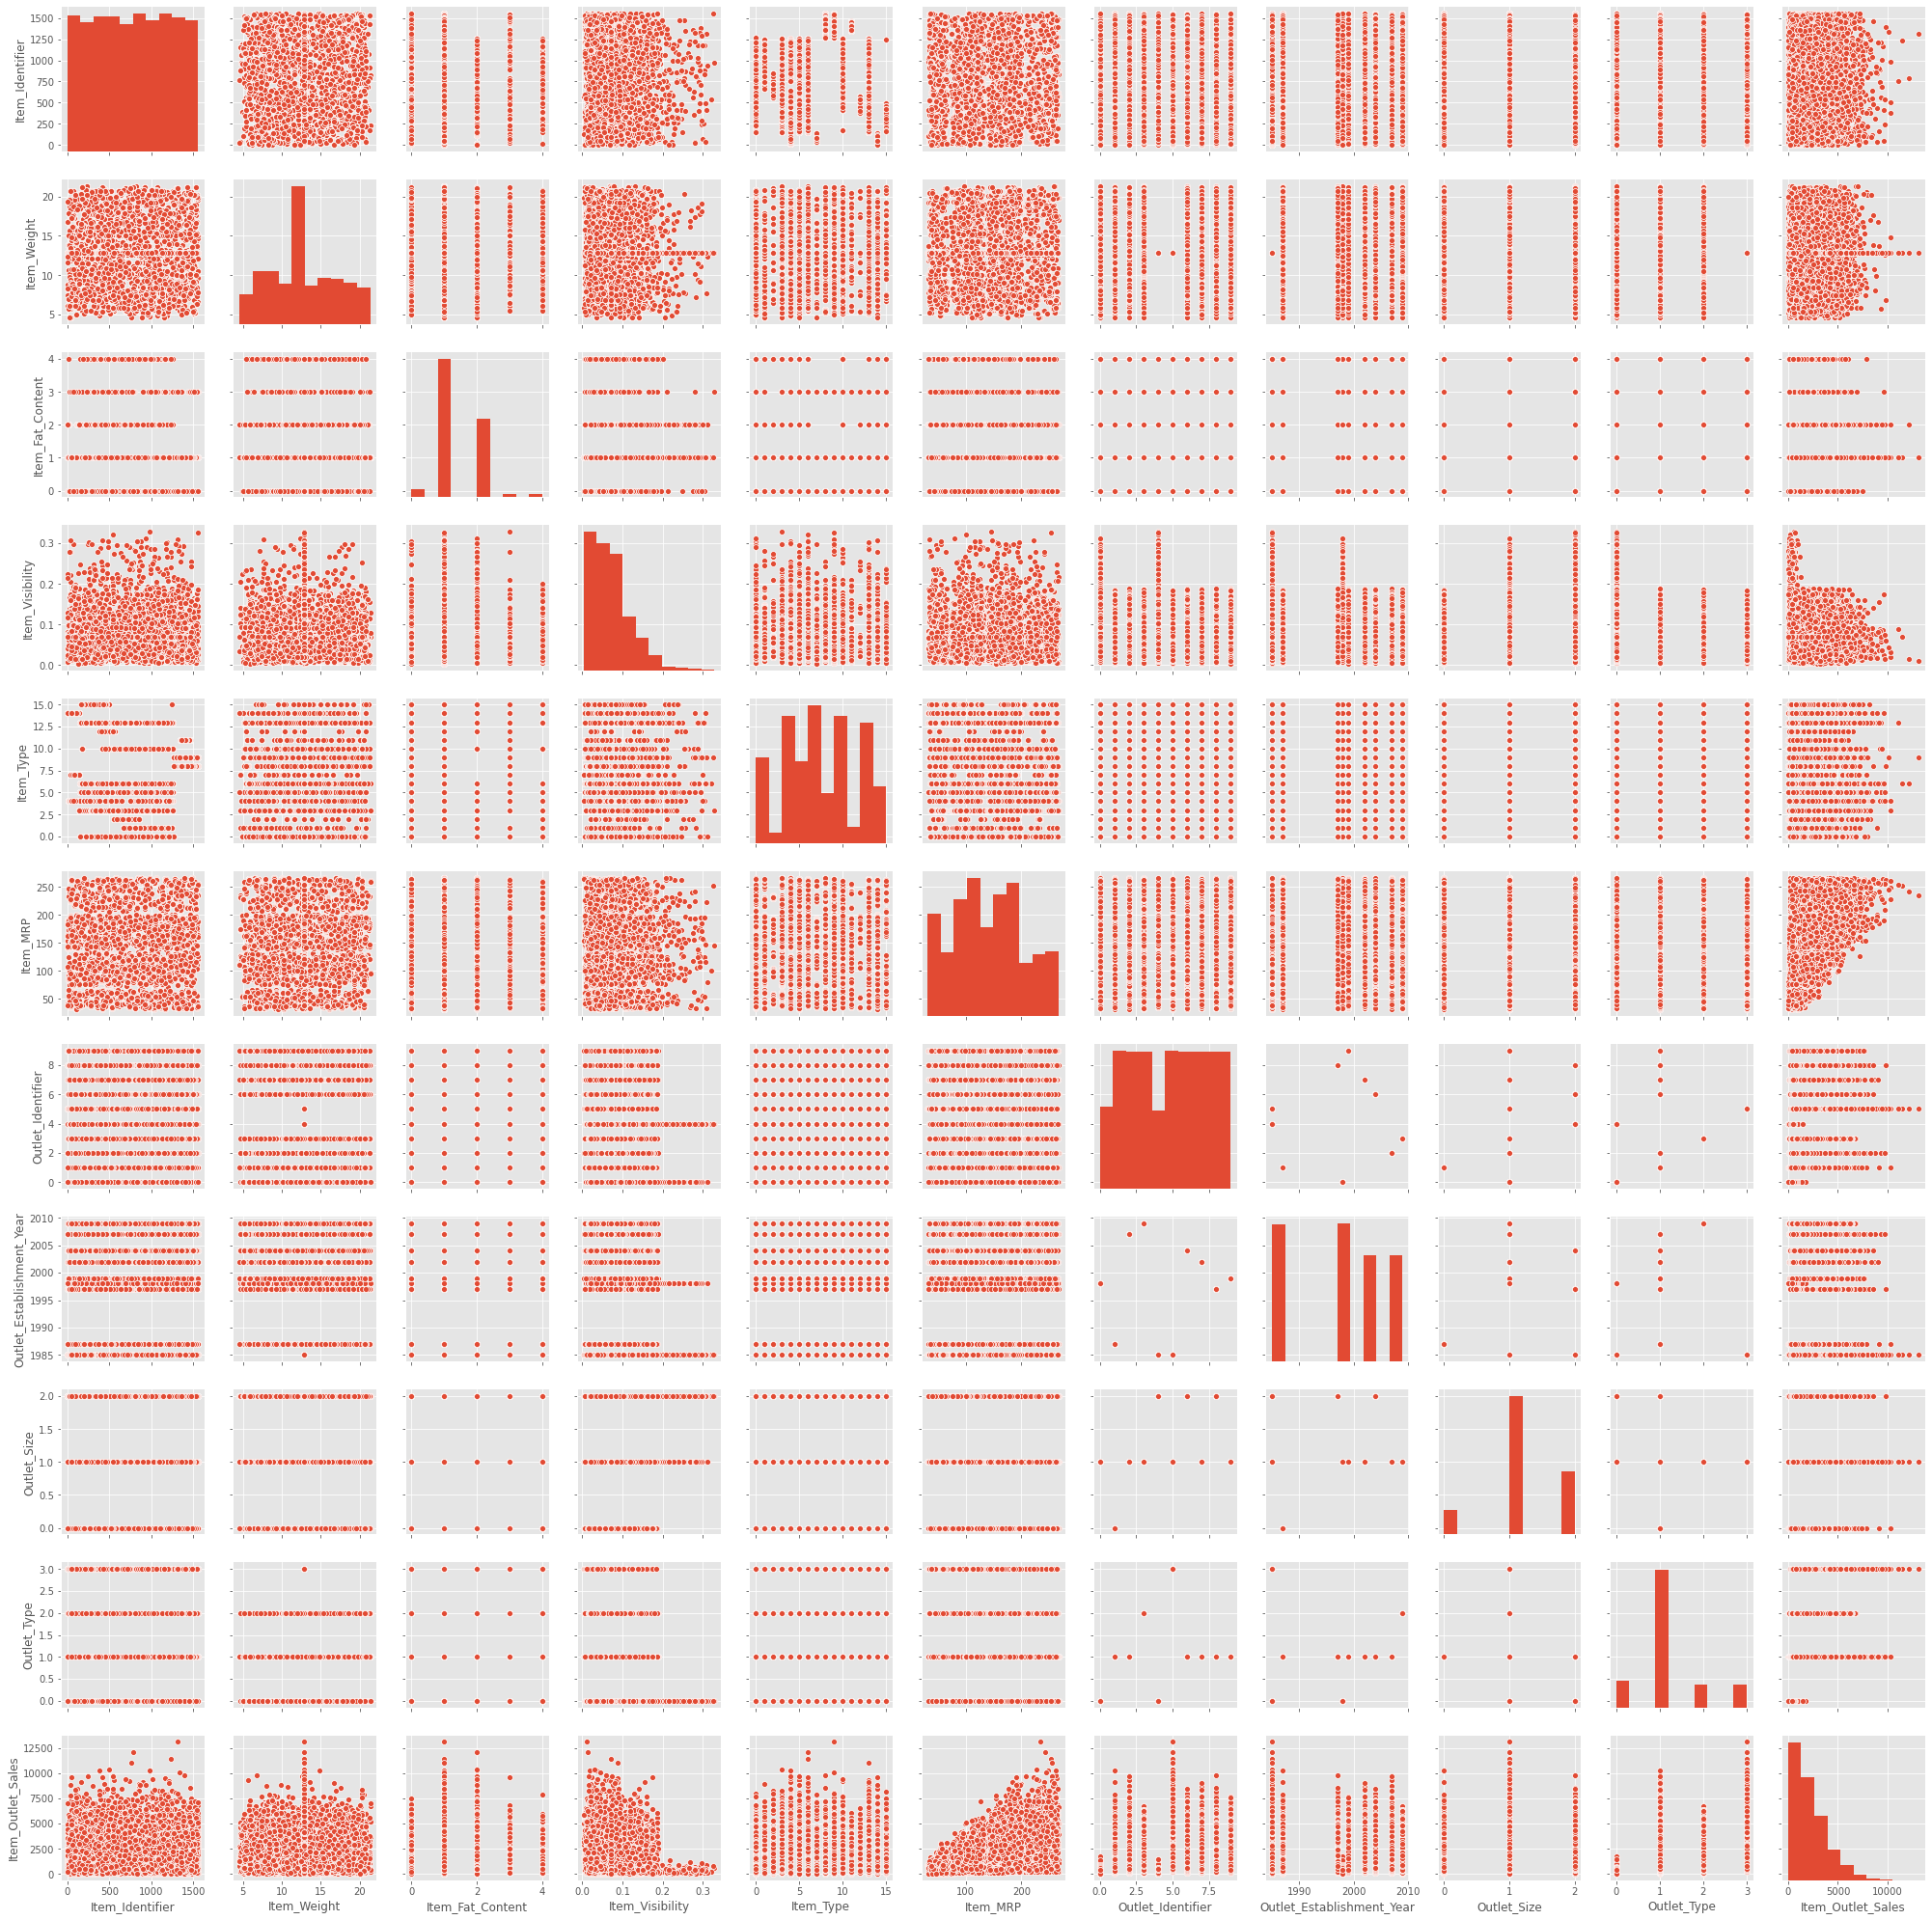

In [382]:
sns.pairplot(df)

In [383]:
#remove skewed data
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])
            
    
print(df.skew())

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content            -0.332843
Item_Visibility              1.113960
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Type                 -0.236040
Item_Outlet_Sales           -0.882266
dtype: float64


In [384]:
df.shape

(8523, 11)

Item_Identifier                  AxesSubplot(0.125,0.71587;0.227941x0.16413)
Item_Weight                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Item_Fat_Content              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Item_Visibility                 AxesSubplot(0.125,0.518913;0.227941x0.16413)
Item_Type                    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Item_MRP                     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Outlet_Identifier               AxesSubplot(0.125,0.321957;0.227941x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Outlet_Size                  AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Outlet_Type                        AxesSubplot(0.125,0.125;0.227941x0.16413)
Item_Outlet_Sales               AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

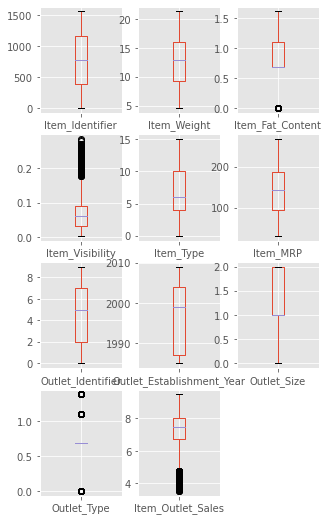

In [385]:
#visualize outlier

df.plot(kind='box',subplots=True,layout=(4,3),figsize=(5,9))

In [386]:
#from above graph we conclude that thr are few outliers presents in data
#remove them
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print(df.shape)

(8066, 11)


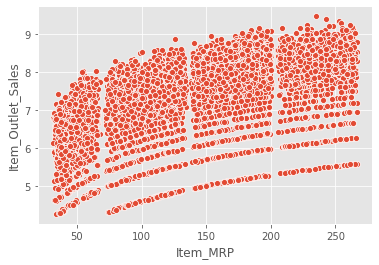

In [387]:
#linear relationship between Item_Outlet_Sales and Item_MRP

sns.scatterplot(data=df, y="Item_Outlet_Sales", x="Item_MRP")

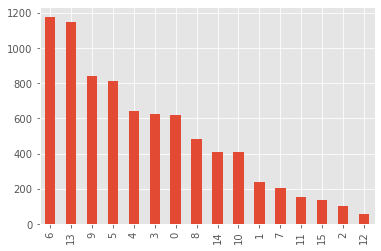

In [388]:
#find item type wise count
df['Item_Type'].value_counts().plot.bar()

Item_Type
0     4458.444257
1     1769.237403
2      748.684285
3     4622.920342
4     4721.593010
5     5939.470361
6     8679.156152
7     1486.408465
8     3519.024957
9     6217.806948
10    2993.553484
11    1119.641764
12     422.834269
13    8532.021717
14    2979.649127
15    1004.558655
Name: Item_Outlet_Sales, dtype: float64


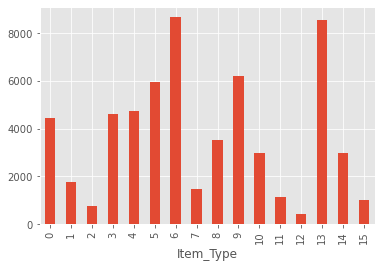

In [389]:
#find item type wise sale
print(df.groupby(['Item_Type']).sum()['Item_Outlet_Sales'])
df.groupby(['Item_Type']).sum()['Item_Outlet_Sales'].plot.bar()

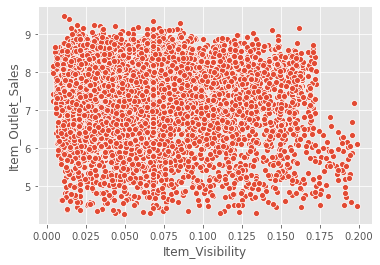

In [402]:

sns.scatterplot(data=df, x="Item_Visibility", y="Item_Outlet_Sales")

In [391]:
#build model

x=df.drop(['Item_Outlet_Sales'],axis=1)
x.shape

y=df.iloc[:,-1]
y.shape


(8066,)

In [392]:
#scaling X data
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [393]:
#defining function to find best param
def findBestParam(parameters,reg_obj):
    grid_cv=GridSearchCV(reg_obj,parameters,cv=2)
    grid_cv.fit(x,y)
    return grid_cv.best_params_

In [394]:
#Finding Best parameters
#for DC classifier criterion will be giny and entrpy
print("DecisionTreeRegressor Best Param :",findBestParam({'criterion':['mse','mae']},DecisionTreeRegressor()))
print("SVR Best Param :",findBestParam({'kernel':['linear','poly','rbf']},SVR()))
print("KNeighborsReg Best Param :",findBestParam({'n_neighbors':[5,10,50,100,150]},KNeighborsRegressor()))
print("LASSO Best Param :",findBestParam({'alpha':[0.1,0.01,0.001,1.0]},Lasso()))
print("RIDGE Best Param :",findBestParam({'alpha':[0.1,0.01,0.001,1.0]},Ridge()))
print("GradientBoostingReg Best Param :",findBestParam({'learning_rate':[0.1,0.01,0.001,1.0],'n_estimators':[5,10,50,100,150]},GradientBoostingRegressor()))


#taking time
#print("AdaBoostReg Best Param :",findBestParam({'learning_rate':[0.1,0.01,0.001,1.0],'n_estimators':[5,10,50,100,150],'base_estimator':[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),RandomForestRegressor()]},AdaBoostRegressor()))
print("RandomForest Best Param :",findBestParam({'n_estimators':[5,10,50,100,150],'criterion':['mse','mae']},RandomForestRegressor()))






DecisionTreeRegressor Best Param : {'criterion': 'mse'}
SVR Best Param : {'kernel': 'rbf'}
KNeighborsReg Best Param : {'n_neighbors': 10}
LASSO Best Param : {'alpha': 0.001}
RIDGE Best Param : {'alpha': 1.0}
GradientBoostingReg Best Param : {'learning_rate': 0.1, 'n_estimators': 50}
RandomForest Best Param : {'criterion': 'mae', 'n_estimators': 150}


In [395]:
#splitting data into train,test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print("x_train.shape",x_train.shape,'x_test.shape',x_test.shape)
print("y_train.shape",y_train.shape,'y_test.shape',y_test.shape)

x_train.shape (5646, 10) x_test.shape (2420, 10)
y_train.shape (5646,) y_test.shape (2420,)


In [396]:
#Making all models and appending in a list
models=[]
models.append(('LinearRegression',LinearRegression()))
models.append(('DecisionTreeRegressor',DecisionTreeRegressor(criterion='mse')))
models.append(('SVR',SVR(kernel='rbf')))
models.append(('KNeighborsRegressor',KNeighborsRegressor(n_neighbors=10)))
models.append(('Lasso',Lasso(alpha=0.001)))
models.append(('Ridge',Ridge(alpha=0.1)))
models.append(('GradientBoostingRegressor',GradientBoostingRegressor(learning_rate=0.1,n_estimators=50)))
models.append(('AdaBoostRegressor',AdaBoostRegressor()))
models.append(('RandomForestRegressor',RandomForestRegressor(criterion='mae',n_estimators=150)))




In [397]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,accuracy_score


#finding all metrics for all model
model_name_list=[]
cross_val_score_list=[]
r2_score_list=[]
score_list=[]
mse_list=[]
mae_list=[]


for reg_name,reg_model in models :

    reg_model.fit(x_train,y_train)
    y_pred=reg_model.predict(x_test)
    
    score_list.append(reg_model.score(x_train,y_train))
    cross_val_score_list.append(cross_val_score(reg_model,x,y,cv=2,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    model_name_list.append(reg_name)
    

In [398]:
#printing metrics
metrics_df=pd.DataFrame({'Model Name':model_name_list,'Score':score_list,'Cross Val Score':cross_val_score_list,'R2 Score':r2_score_list,'Mean Squared Error':mse_list,'Mean Absolute Error':mae_list})
metrics_df

,Model Name,Score,Cross Val Score,R2 Score,Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.599117,0.601644,0.612004,0.370381,0.484813
1,DecisionTreeRegressor,1.000000,0.414920,0.425186,0.548717,0.564972
2,SVR,0.737455,0.687547,0.693953,0.292153,0.411168
3,KNeighborsRegressor,0.719660,0.646603,0.665296,0.319508,0.437029
4,Lasso,0.599105,0.601712,0.611985,0.370399,0.484811
5,Ridge,0.599117,0.601644,0.612004,0.370381,0.484814
6,GradientBoostingRegressor,0.729457,0.710175,0.708923,0.277862,0.407365
7,AdaBoostRegressor,0.640325,0.631127,0.625759,0.357250,0.493052
8,RandomForestRegressor,0.954203,0.675941,0.678901,0.306521,0.428802


In [399]:
reg_model=GradientBoostingRegressor(learning_rate=0.1,n_estimators=50)
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=r_state)
    reg_model.fit(x_train,y_train)
    y_pred=reg_model.predict(x_test)
    r2_sc=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state : ",r_state,"   is : ",r2_sc)   
       

r2 score corresponding to random state :  42    is :  0.7010477377956847
r2 score corresponding to random state :  43    is :  0.7227456397003094
r2 score corresponding to random state :  44    is :  0.7404972972035764
r2 score corresponding to random state :  45    is :  0.7288654666604486
r2 score corresponding to random state :  46    is :  0.7027218904215102
r2 score corresponding to random state :  47    is :  0.7139312279261166
r2 score corresponding to random state :  48    is :  0.7186128088571112
r2 score corresponding to random state :  49    is :  0.7079916396334871
r2 score corresponding to random state :  50    is :  0.7082907843254765
r2 score corresponding to random state :  51    is :  0.7193461305806398
r2 score corresponding to random state :  52    is :  0.7205287286962472
r2 score corresponding to random state :  53    is :  0.707369742062439
r2 score corresponding to random state :  54    is :  0.7358479515660709
r2 score corresponding to random state :  55    is :

In [400]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=44)
reg_model.fit(x_train,y_train)
y_pred=reg_model.predict(x_test)
r2_sc=r2_score(y_test,y_pred)
mean_abs_error=mean_absolute_error(y_test,y_pred)
mean_sqr_error=mean_squared_error(y_test,y_pred)
print("r2_sc",r2_sc,"mean_abs_error",mean_abs_error,"mean_sqr_error",mean_sqr_error)

r2_sc 0.7404014126339442 mean_abs_error 0.3849591386396069 mean_sqr_error 0.25015949892223327


In [401]:
#GradientBoostingRegressor is performing well than rest of the model 
#store model 

joblib.dump(reg_model,'BigMart_GredientBoostingReg.pkl')

['BigMart_GredientBoostingReg.pkl']